# FYSS5403 Homework 2, Otto Salmenkivi

## Excercise 1
a)  

$
\begin{align}
|ab\rangle &= \frac{2}{3}|00\rangle + \frac{1}{3}|01\rangle - \frac{2}{3}|11\rangle 
= \begin{bmatrix}\frac{2}{3} \\ \frac{1}{3} \\ 0 \\ -\frac{1}{3}\end{bmatrix}
\end{align}
$
If the state would be separable, we could write it as  
$
\begin{equation}
\begin{cases}
    \frac{2}{3} = b_0a_0\\
    \frac{1}{3} = b_0a_1\\
    0 = b_1a_0\quad\Rightarrow\quad b_1 = 0\quad\text{or}\quad{a}_0 = 0\\
    -\frac{2}{3} = b_1a_1\\
\end{cases}
\end{equation}
$
  
Because $b_1 = 0$ or $a_0 = 0$, the first or the last equation would equal zero, so the state $|ab\rangle$ cannot be contructed by the tensor product of two states $|a\rangle$ and $|b\rangle$.  
  
b)  
  
Let's set $|a\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle-i|1\rangle\right)$ and $|b\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+i|1\rangle\right)$.  
$
\begin{align}
|ba\rangle= |b\rangle \otimes |a\rangle
=\frac{1}{\sqrt{2}}\left(|0\rangle+i|1\rangle\right) \otimes \frac{1}{\sqrt{2}}\left(|0\rangle-i|1\rangle\right)
= \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -i \\ i \\ 1 \end{bmatrix}
= \frac{1}{2}\left(|00\rangle - i|01\rangle + i|10\rangle + |11\rangle\right)
\end{align}
$  
The result is the wanted state, so it can be separated.  
  
c)  
$  
\begin{align}
|ab\rangle &= \frac{1}{2}\left(|00\rangle - |01\rangle + |10\rangle + |11\rangle\right)
= \frac{1}{2} \begin{bmatrix}1 \\ -1 \\ 1 \\ 1\end{bmatrix}
\end{align}
$  
Like in part a, we get
  
$
\begin{equation}
\begin{cases}
    1 &=& b_0a_0\\
    -1 &=& b_0a_1\\
    1 &=& b_1a_0\\
    1 &=& b_1a_1\\
\end{cases}
\end{equation}
$
  
We know $a_0$, $a_1$, $b_0$ and $b_1$ are all non-zero. When dividing the first equation by the third, we get $b_0 = b_1$, and when dividing the second by the fourth, we get $b_0 = -b_1$. Therefore there is no such combination of  $a_0$, $a_1$, $b_0$ and $b_1$ that would solve the system of equations above, and consequently no way of separating the state $\frac{1}{2}\left(|00\rangle - |01\rangle + |10\rangle + |11\rangle\right)$.

  

## Ecxercise 2
### a)
  $|\Phi^{\pm}\rangle = \frac{1}{\sqrt{2}}(|00\rangle\pm|11\rangle)$  
  
  Lets first build the circuit corresponding to the $|\Phi^{+}\rangle$.

In [1]:
from qiskit import *
IBMQ.load_account()

/Applications/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

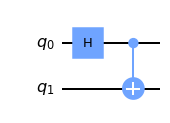

In [2]:
bell1 = QuantumCircuit(2)
bell1.h(0)
bell1.cx(0,1)
bell1.draw(output = 'mpl')

In [3]:
sv_sim = Aer.get_backend('statevector_simulator')
bell1_sv = execute(bell1, backend = sv_sim).result().get_statevector()
print(bell1_sv)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


And then $|\Phi^{-}\rangle$

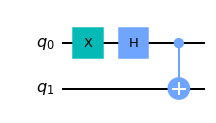

In [4]:
bell2 = QuantumCircuit(2)
bell2.x(0)
bell2.h(0)
bell2.cx(0,1)
bell2.draw(output = 'mpl')

In [5]:
bell2_sv = execute(bell2, backend = sv_sim).result().get_statevector()
print(bell2_sv)

[ 0.70710678-8.65956056e-17j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j -0.70710678+8.65956056e-17j]


### b)

  $|\Psi^{+}\rangle = \frac{1}{\sqrt{2}}(|01\rangle+|10\rangle)$  


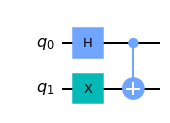

In [6]:
bell3 = QuantumCircuit(2)
bell3.x(1)
bell3.h(0)
bell3.cx(0,1)
bell3.draw(output = 'mpl')

In [7]:
bell3_sv = execute(bell3, backend = sv_sim).result().get_statevector()
print(bell3_sv)

[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]


$|\Psi^{-}\rangle = \frac{1}{\sqrt{2}}(|01\rangle-|10\rangle)$

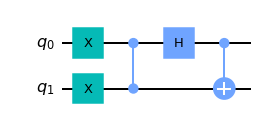

In [8]:
bell4 = QuantumCircuit(2)
bell4.x(0)
bell4.x(1)
bell4.cz(0,1) #additional phase shift needed?
bell4.h(0)
bell4.cx(0,1)
bell4.draw(output = 'mpl')

In [9]:
bell4_sv = execute(bell4, backend = sv_sim).result().get_statevector()
print(bell4_sv)

[ 0.        +0.00000000e+00j  0.70710678-8.65956056e-17j
 -0.70710678+8.65956056e-17j  0.        +0.00000000e+00j]


c)

With singular value decomposition with WolframAlpha, from $|\Psi\rangle = \frac{1}{\sqrt{12}}(3|00\rangle + |01\rangle +|10\rangle -|11\rangle)$
  
we get
  
$
M = \frac{1}{\sqrt{12}}\begin{bmatrix} 3 & 1 \\ 1 & -1 \end{bmatrix} = UBV^\dagger \\ \text{where}\quad U=\begin{bmatrix} 0,9732 & 0,2297 \\ 0,2297 & - 0,9732\end{bmatrix}, B=\begin{bmatrix} 0,9341 & 0 \\ 0  & 0,3568\end{bmatrix}\ \text{and}\ V=\begin{bmatrix} 0,9732 & -0,2297 \\ 0,2297  & 0,9732\end{bmatrix}
$
  
We can construct the U and V matrices with the U3($\theta,\phi,\lambda$) gate with $\theta =  2\arccos{(0,9732)}$ and $\phi = \lambda = 0$. The B matrix can also be implemented with the U3 gate.
  